In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

###
import pandas as pd
df = pd.read_csv(r'C:\Users\User\Downloads/b_depressed.csv')
df

,Survey_id,Ville_id,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,...,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed
0,926,91,1,28,1,4,10,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
1,747,57,1,23,1,3,8,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,1
2,1190,115,1,22,1,3,9,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
3,1065,97,1,27,1,2,10,4,52667108,19698904,...,0,1,0,1,22288055,18751329,0,7781123,69219765.0,0
4,806,42,0,59,0,4,10,6,82606287,17352654,...,1,0,0,0,53384566,20731006,1,20100562,43419447.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1424,255,22,1,25,1,1,7,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
1425,547,69,1,28,1,4,10,6,15711078,24023054,...,0,1,0,0,23022095,1021536,0,1823477,47384361.0,0
1426,893,184,1,66,0,0,1,1,42440731,22861940,...,0,1,0,0,12545373,10454478,0,46444572,10454478.0,1
1427,363,75,1,51,1,1,12,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0


Survey id

Ville id

sex

Age

Married

Number children

education level

total members

gained asset

durable asset

save asset

living expenses

other expenses

incoming salary

incoming own farm

incoming business

incoming no business

incoming_agricultural

farm expenses

labor primary

lasting investment

no lasting investmen

depressed

In [3]:
df.dropna(inplace=True)

df.gained_asset=df.gained_asset/10000
df.durable_asset=df.durable_asset/10000
df.save_asset=df.save_asset/10000
df.living_expenses=df.living_expenses/10000
df.other_expenses=df.other_expenses/10000
df.incoming_agricultural=df.incoming_agricultural/10000
df.farm_expenses=df.farm_expenses/10000
df.lasting_investment=df.lasting_investment/10000
df.no_lasting_investmen=df.no_lasting_investmen/10000

df.gained_asset=round(df.gained_asset)
df.durable_asset=round(df.durable_asset)
df.living_expenses=round(df.living_expenses)
df.other_expenses=round(df.other_expenses)
df.incoming_agricultural=round(df.incoming_agricultural)
df.farm_expenses=round(df.farm_expenses)
df.lasting_investment=round(df.lasting_investment)
df.no_lasting_investmen=round(df.no_lasting_investmen)

In [66]:
df.depressed.value_counts()

0    1174
1     235
Name: depressed, dtype: int64

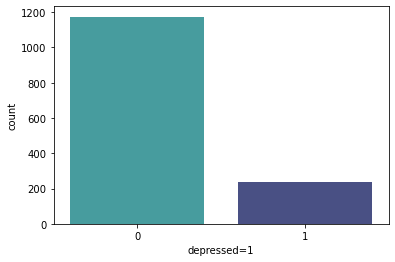

In [68]:
sns.countplot(x='depressed', data=df, palette="mako_r")
plt.xlabel("depressed=1")
plt.show()

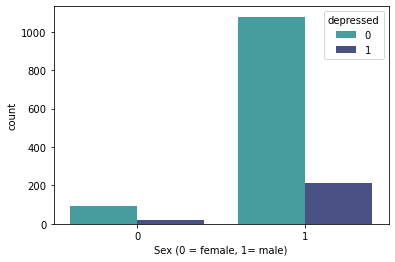

In [41]:


sns.countplot(x='sex',hue='depressed', data=df, palette="mako_r")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()


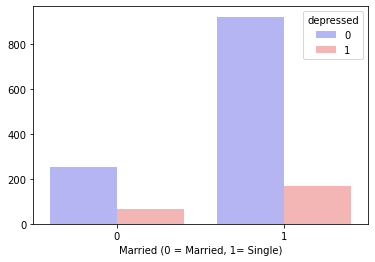

In [40]:

sns.countplot(x='Married',hue='depressed', data=df, palette="bwr")
plt.xlabel("Married (0 = Married, 1= Single)")
plt.ylabel("")
plt.show()

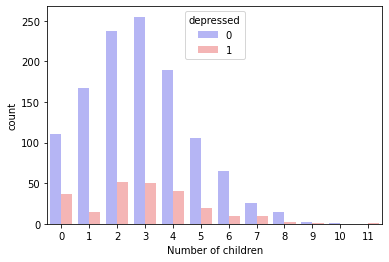

In [36]:
sns.countplot(x='Number_children',hue='depressed' , data=df, palette="bwr")
plt.xlabel("Number of children")
plt.show()

In [4]:
a= df.groupby (by=('Age'))["depressed"].count()
df2= df[df['depressed']==1]
b= df2.groupby (by=('Age'))["depressed"].count()

In [7]:
a

Age
17     8
18    17
19    36
20    49
21    44
      ..
82     1
84     1
85     1
87     1
91     1
Name: depressed, Length: 69, dtype: int64

In [6]:
b

Age
17     2
18     2
19     2
20     4
21     5
22    11
23    11
24    11
25    16
26     6
27     9
28     7
29     7
30     6
31     9
32     5
33     4
34     6
35     7
36     7
37     6
38     3
39     6
40     3
41     3
42     5
43     9
46     1
47     2
48     5
49     5
50     2
51     4
52     5
53     3
54     1
55     2
56     3
58     2
59     1
60     1
61     3
62     1
63     1
65     1
66     2
67     3
69     1
70     1
71     1
73     3
74     1
78     1
80     2
81     3
84     1
87     1
Name: depressed, dtype: int64

In [96]:
dfa= a.to_frame()
dfb= b.to_frame()

Text(0, 0.5, 'number')

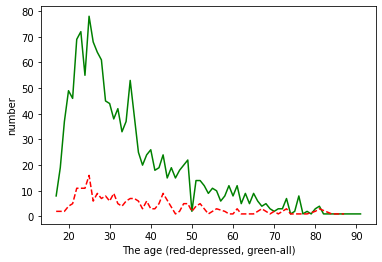

In [99]:
plt.plot(dfa,'g')
plt.plot(dfb,'r--')
plt.xlabel("The age (red-depressed, green-all)")
plt.ylabel("number")

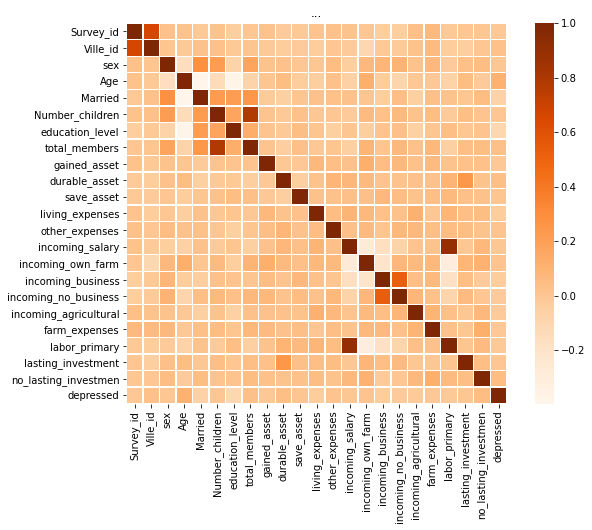

In [5]:
plt.subplots(figsize=(10, 7))
sns.heatmap(df.corr(), linewidths=0.4 , square=True, cmap = 'Oranges')
plt.title('...')
plt.show()

modeling

In [60]:
from sklearn.model_selection import train_test_split
x = df.drop('depressed', axis=1)
y = df.depressed
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
print (x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(986, 22) (423, 22)
(986,) (423,)


In [87]:
df.depressed.value_counts()

g = df.depressed.value_counts()
from __future__ import division
pcts = g / g.sum()
pcts

0    0.833215
1    0.166785
Name: depressed, dtype: float64

In [83]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(x,y)
dummy_clf.predict(x)
print("Dummy Classifier Score : ",dummy_clf.score(x, y))

Dummy Classifier Score :  0.8332150461320085


In [ ]:
pred = (knn.predict_proba(X_test)[:,1]>0.2).astype(int)

In [110]:
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(x_train, y_train)
prediction = (knn.predict_proba(x_test)[:,1]>0.40).astype(int) # chaing threshold
accuracy_score(y_test, prediction)

0.817966903073286

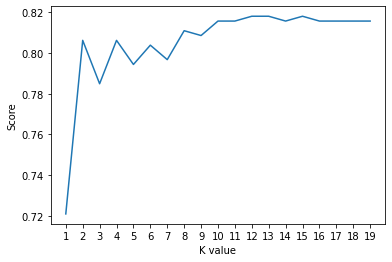

the maximum KNN score is: 81.7966903073286% while k=1


In [91]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
arr = []
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train, y_train)
    knn_predict = knn.predict(x_test)
    arr.append(accuracy_score(y_test, knn_predict))
    
plt.plot(range(1,20), arr)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

maxS = max(arr)*100
print ("the maximum KNN score is: " + str(maxS) + "% while k=1")

In [78]:
df_drop= df.drop('Survey_id',axis=1)
df_drop= df_drop.drop('Ville_id',axis=1)
df_drop= df_drop.drop('no_lasting_investmen',axis=1)
df_drop= df_drop.drop('lasting_investment',axis=1)
#df_drop= df_drop.drop('Ville_id',axis=1)

from sklearn.model_selection import train_test_split
x = df_drop.drop('depressed', axis=1)
y = df_drop.depressed
x_traind, x_testd, y_traind, y_testd = train_test_split(x, y, test_size=0.3)
print (x_traind.shape, x_testd.shape)
print(y_traind.shape, y_testd.shape)

(986, 18) (423, 18)
(986,) (423,)


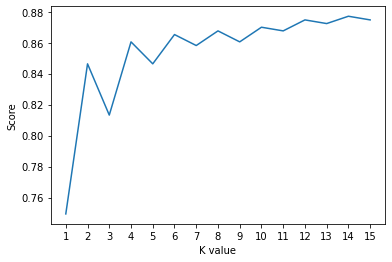

the maximum KNN score is: 87.70685579196218% while k=1


In [93]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
arr = []
for i in range(1,16):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_traind, y_traind)
    knn_predict = knn.predict(x_testd)
    arr.append(accuracy_score(y_testd, knn_predict))
    
plt.plot(range(1,16), arr)
plt.xticks(np.arange(1,16,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

maxS = max(arr)*100
print ("the maximum KNN score is: " + str(maxS) + "% while k=1")

Random Forest

In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [97]:
from sklearn.metrics import accuracy_score
knn = RandomForestClassifier()
knn.fit(x_train, y_train)
prediction = knn.predict(x_test)
accuracy_score(y_test, prediction)

0.8156028368794326

LogisticRegression

In [100]:
from sklearn.metrics import accuracy_score #?
knn = LogisticRegression()
knn.fit(x_train, y_train)
prediction = knn.predict(x_test)
accuracy_score(y_test, prediction)

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8156028368794326

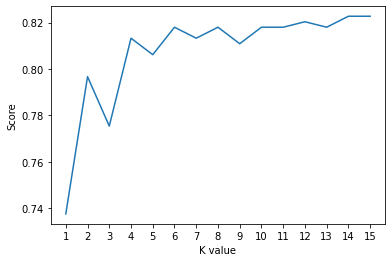

the maximum KNN score is: 82.26950354609929% while k=1


In [36]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
arr = []
for i in range(1,16):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train, y_train)
    knn_predict = knn.predict(x_test)
    arr.append(accuracy_score(y_test, knn_predict))
    
plt.plot(range(1,16), arr)
plt.xticks(np.arange(1,16,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

maxS = max(arr)*100
print ("the maximum KNN score is: " + str(maxS) + "% while k=1")

In [27]:
df

,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,save_asset,living_expenses,...,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed
0,1,28,1,4,10,5,2891.0,2286.0,2339.9979,2669.0,...,0,0,0,0,3003.0,3136.0,0,2841.0,2829.0,0
1,1,23,1,3,8,5,2891.0,2286.0,2339.9979,2669.0,...,0,0,0,0,3003.0,3136.0,0,2841.0,2829.0,1
2,1,22,1,3,9,5,2891.0,2286.0,2339.9979,2669.0,...,0,0,0,0,3003.0,3136.0,0,2841.0,2829.0,0
3,1,27,1,2,10,4,5267.0,1970.0,4964.7648,40.0,...,0,1,0,1,2229.0,1875.0,0,778.0,6922.0,0
4,0,59,0,4,10,6,8261.0,1735.0,2339.9979,8088.0,...,1,0,0,0,5338.0,2073.0,1,2010.0,4342.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1424,1,25,1,1,7,5,2891.0,2286.0,2339.9979,2669.0,...,0,0,0,0,3003.0,3136.0,0,2841.0,2829.0,0
1425,1,28,1,4,10,6,1571.0,2402.0,1550.6558,1048.0,...,0,1,0,0,2302.0,102.0,0,182.0,4738.0,0
1426,1,66,0,0,1,1,4244.0,2286.0,2256.2605,1255.0,...,0,1,0,0,1255.0,1045.0,0,4644.0,1045.0,1
1427,1,51,1,1,12,5,2891.0,2286.0,2339.9979,2669.0,...,0,0,0,0,3003.0,3136.0,0,2841.0,2829.0,0


In [37]:
df.describe()

,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,save_asset,living_expenses,...,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed
count,1409.000000,1409.000000,1409.000000,1409.000000,1409.000000,1409.000000,1409.000000,1409.000000,1409.000000,1409.000000,...,1409.000000,1409.000000,1409.000000,1409.000000,1409.000000,1409.000000,1409.000000,1409.000000,1409.000000,1409.000000
mean,0.918382,34.733854,0.774308,2.904897,8.697658,4.996451,3360.491128,2707.022711,2744.452759,3248.574166,...,0.176011,0.254081,0.109297,0.264017,3457.442867,3554.889283,0.209368,3300.557842,3360.300923,0.166785
std,0.273879,13.800712,0.418186,1.872585,2.913673,1.772778,2007.893483,1804.305926,1778.910723,2101.287586,...,0.380965,0.435498,0.312123,0.440965,2091.841128,2126.767883,0.407002,2114.983591,2160.254917,0.372916
min,0.000000,17.000000,0.000000,0.000000,1.000000,1.000000,33.000000,16.000000,17.296600,26.000000,...,0.000000,0.000000,0.000000,0.000000,33.000000,27.000000,0.000000,7.000000,13.000000,0.000000
25%,1.000000,25.000000,1.000000,2.000000,8.000000,4.000000,2313.000000,1930.000000,2339.997900,2103.000000,...,0.000000,0.000000,0.000000,0.000000,2296.000000,2240.000000,0.000000,2010.000000,2064.000000,0.000000
50%,1.000000,31.000000,1.000000,3.000000,9.000000,5.000000,2891.000000,2286.000000,2339.997900,2669.000000,...,0.000000,0.000000,0.000000,0.000000,3003.000000,3136.000000,0.000000,2841.000000,2829.000000,0.000000
75%,1.000000,42.000000,1.000000,4.000000,10.000000,6.000000,3717.000000,2635.000000,2339.997900,3870.000000,...,0.000000,1.000000,0.000000,1.000000,4004.000000,4400.000000,0.000000,3978.000000,4152.000000,0.000000
max,1.000000,91.000000,1.000000,11.000000,19.000000,12.000000,9913.000000,9962.000000,9992.675800,9930.000000,...,1.000000,1.000000,1.000000,1.000000,9979.000000,9965.000000,1.000000,9945.000000,9965.000000,1.000000


In [59]:
import numpy as np

In [62]:
la= list(a)

In [63]:
la[1]

0.11764705882352941

In [66]:
b= df.groupby (by=('Age'))["depressed"].count()

In [67]:
b

Age
17     8
18    17
19    36
20    49
21    44
      ..
82     1
84     1
85     1
87     1
91     1
Name: depressed, Length: 69, dtype: int64

In [68]:
index= 'r1 r2 r3 r4 r5 r6 r7 r8 r9 r10'.split()
columns= 'Age num'.split()

In [70]:
df1 = pd.DataFrame (data =b ,  columns = columns)

In [71]:
df1

,Age,num


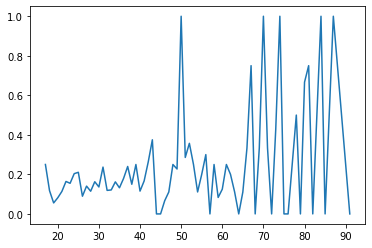

In [49]:
plt.plot(a)

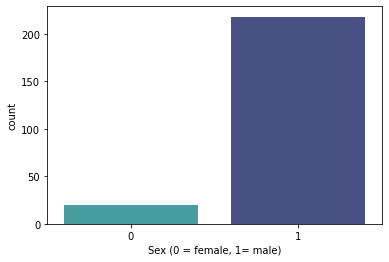

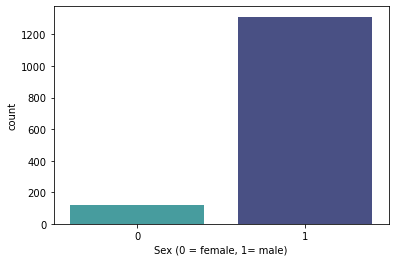

In [55]:
df1= df[df['depressed']==1]

sns.countplot(x='sex', data=df1, palette="mako_r")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

sns.countplot(x='sex', data=df, palette="mako_r")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

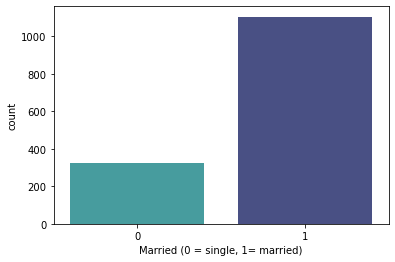

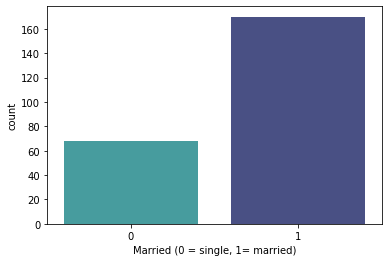

In [56]:
sns.countplot(x='Married', data=df, palette="mako_r")
plt.xlabel("Married (0 = single, 1= married)")
plt.show()

sns.countplot(x='Married', data=df1, palette="mako_r")
plt.xlabel("Married (0 = single, 1= married)")
plt.show()

In [61]:
from sklearn.model_selection import train_test_split
x = df.drop('depressed', axis=1)
y = df.depressed
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
print (x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(1000, 22) (429, 22)
(1000,) (429,)


In [58]:
df.fillna(value=0)  #?

,Survey_id,Ville_id,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,...,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed
0,926,91,1,28,1,4,10,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
1,747,57,1,23,1,3,8,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,1
2,1190,115,1,22,1,3,9,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
3,1065,97,1,27,1,2,10,4,52667108,19698904,...,0,1,0,1,22288055,18751329,0,7781123,69219765.0,0
4,806,42,0,59,0,4,10,6,82606287,17352654,...,1,0,0,0,53384566,20731006,1,20100562,43419447.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1424,255,22,1,25,1,1,7,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
1425,547,69,1,28,1,4,10,6,15711078,24023054,...,0,1,0,0,23022095,1021536,0,1823477,47384361.0,0
1426,893,184,1,66,0,0,1,1,42440731,22861940,...,0,1,0,0,12545373,10454478,0,46444572,10454478.0,1
1427,363,75,1,51,1,1,12,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0


In [59]:
df.gained_asset=df.gained_asset/10000
df.durable_asset=df.durable_asset/10000
df.save_asset=df.save_asset/10000
df.living_expenses=df.living_expenses/10000
df.other_expenses=df.other_expenses/10000
df.incoming_agricultural=df.incoming_agricultural/10000
df.farm_expenses=df.farm_expenses/10000
df.lasting_investment=df.lasting_investment/10000
df.no_lasting_investmen=df.no_lasting_investmen/10000

In [34]:
df

,Survey_id,Ville_id,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,...,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed
0,926,91,1,28,1,4,10,5,2891.2201,2286.1940,...,0,0,0,0,3002.8818,3136.3432,0,2841.1718,2829.2707,0
1,747,57,1,23,1,3,8,5,2891.2201,2286.1940,...,0,0,0,0,3002.8818,3136.3432,0,2841.1718,2829.2707,1
2,1190,115,1,22,1,3,9,5,2891.2201,2286.1940,...,0,0,0,0,3002.8818,3136.3432,0,2841.1718,2829.2707,0
3,1065,97,1,27,1,2,10,4,5266.7108,1969.8904,...,0,1,0,1,2228.8055,1875.1329,0,778.1123,6921.9765,0
4,806,42,0,59,0,4,10,6,8260.6287,1735.2654,...,1,0,0,0,5338.4566,2073.1006,1,2010.0562,4341.9447,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1424,255,22,1,25,1,1,7,5,2891.2201,2286.1940,...,0,0,0,0,3002.8818,3136.3432,0,2841.1718,2829.2707,0
1425,547,69,1,28,1,4,10,6,1571.1078,2402.3054,...,0,1,0,0,2302.2095,102.1536,0,182.3477,4738.4361,0
1426,893,184,1,66,0,0,1,1,4244.0731,2286.1940,...,0,1,0,0,1254.5373,1045.4478,0,4644.4572,1045.4478,1
1427,363,75,1,51,1,1,12,5,2891.2201,2286.1940,...,0,0,0,0,3002.8818,3136.3432,0,2841.1718,2829.2707,0


In [60]:
df.gained_asset=round(df.gained_asset)
df.durable_asset=round(df.durable_asset)
df.living_expenses=round(df.living_expenses)
df.other_expenses=round(df.other_expenses)
df.incoming_agricultural=round(df.incoming_agricultural)
df.farm_expenses=round(df.farm_expenses)
df.lasting_investment=round(df.lasting_investment)
df.no_lasting_investmen=round(df.no_lasting_investmen)

In [44]:
df

,index,Survey_id,Ville_id,sex,Age,Married,Number_children,education_level,total_members,gained_asset,...,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed
0,0,926,91,1,28,1,4,10,5,2891.0,...,0,0,0,0,3003.0,3136.0,0,2841.0,2829.0,0
1,1,747,57,1,23,1,3,8,5,2891.0,...,0,0,0,0,3003.0,3136.0,0,2841.0,2829.0,1
2,2,1190,115,1,22,1,3,9,5,2891.0,...,0,0,0,0,3003.0,3136.0,0,2841.0,2829.0,0
3,3,1065,97,1,27,1,2,10,4,5267.0,...,0,1,0,1,2229.0,1875.0,0,778.0,6922.0,0
4,4,806,42,0,59,0,4,10,6,8261.0,...,1,0,0,0,5338.0,2073.0,1,2010.0,4342.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1424,1424,255,22,1,25,1,1,7,5,2891.0,...,0,0,0,0,3003.0,3136.0,0,2841.0,2829.0,0
1425,1425,547,69,1,28,1,4,10,6,1571.0,...,0,1,0,0,2302.0,102.0,0,182.0,4738.0,0
1426,1426,893,184,1,66,0,0,1,1,4244.0,...,0,1,0,0,1255.0,1045.0,0,4644.0,1045.0,1
1427,1427,363,75,1,51,1,1,12,5,2891.0,...,0,0,0,0,3003.0,3136.0,0,2841.0,2829.0,0


In [49]:
x_train

,index,Survey_id,Ville_id,sex,Age,Married,Number_children,education_level,total_members,gained_asset,...,other_expenses,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen
615,615,617,41,1,29,1,5,9,7,5369.0,...,6054.0,0,0,1,1,3603.0,7007.0,0,1168.0,2078.0
754,754,1413,89,1,25,1,4,8,6,7539.0,...,5862.0,0,1,0,0,201.0,4302.0,0,364.0,3006.0
1086,1086,813,49,1,27,1,4,10,6,3304.0,...,5926.0,1,0,0,0,3844.0,2703.0,1,4206.0,4534.0
58,58,1179,19,1,49,0,1,14,2,8261.0,...,1976.0,0,1,0,1,3337.0,705.0,0,1924.0,2927.0
1024,1024,1233,41,1,37,1,7,11,10,7435.0,...,2399.0,0,0,0,1,1028.0,3572.0,0,1311.0,4161.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1036,1036,1033,34,1,22,1,2,8,4,8261.0,...,6999.0,0,0,0,0,1468.0,2024.0,0,1644.0,4046.0
791,791,558,32,1,35,1,2,10,4,1790.0,...,1762.0,0,1,0,0,1068.0,9965.0,0,3930.0,9965.0
1191,1191,1378,210,1,30,1,2,14,4,2739.0,...,2570.0,0,0,0,0,320.0,3114.0,0,3653.0,1606.0
388,388,1046,11,1,25,1,0,10,2,8950.0,...,9946.0,0,0,1,1,4671.0,5895.0,0,1263.0,3793.0


In [50]:
y_train

615     0
754     0
1086    0
58      0
1024    0
       ..
1036    0
791     0
1191    0
388     0
22      0
Name: depressed, Length: 1000, dtype: int64

In [70]:
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)
prediction = knn.predict(x_test)
accuracy_score(y_test, prediction)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1429 entries, 0 to 1428
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Survey_id              1429 non-null   int64  
 1   Ville_id               1429 non-null   int64  
 2   sex                    1429 non-null   int64  
 3   Age                    1429 non-null   int64  
 4   Married                1429 non-null   int64  
 5   Number_children        1429 non-null   int64  
 6   education_level        1429 non-null   int64  
 7   total_members          1429 non-null   int64  
 8   gained_asset           1429 non-null   int64  
 9   durable_asset          1429 non-null   int64  
 10  save_asset             1429 non-null   int64  
 11  living_expenses        1429 non-null   int64  
 12  other_expenses         1429 non-null   int64  
 13  incoming_salary        1429 non-null   int64  
 14  incoming_own_farm      1429 non-null   int64  
 15  inco